In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os
import numpy 

In [2]:
root = Path('../checkpoints')

In [62]:
def plot_subgraph(scores, logscale, title):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0,0].plot(scores[title], scores['loss'])
    ax[0,0].set_title(f'loss vs {title}')
    
    ax[0,1].plot(scores[title], scores['Recall@1'])
    ax[0,1].set_title(f'Recall@1 vs {title}')

    ax[1,0].plot(scores[title], scores['Recall@5'])
    ax[1,0].set_title(f'Recall@5 vs {title}')
   
    ax[1,1].plot(scores[title], scores['Recall@20'])
    ax[1,1].set_title(f'Recall@20 vs {title}')
    
    if logscale:
        ax[0,0].set_xscale('log')
        ax[0,1].set_xscale('log')
        ax[1,0].set_xscale('log')
        ax[1,1].set_xscale('log')
    
    for a in ax:
        for b in a:
            b.set_xlabel(title)
    ax[0,0].set_ylabel('loss')
    ax[0,1].set_ylabel('Recall@1')
    ax[1,0].set_ylabel('Recall@5')
    ax[1,1].set_ylabel('Recall@20')
    fig.tight_layout()

## Performance vs Learning Rate 

In [3]:
def get_vs_lr_scores(learning_rates_str, top_k):
    scores = {'loss': list(), 'Recall@1': list(), 'Recall@5': list(), 'Recall@20': list()}
    lr_list = list()
    for lr_str in learning_rates_str:
        dir_path = root / '1' / f'top{top_k}' / lr_str
        file_name = [x for x in os.listdir(dir_path) if x.startswith('best_checkpoint_')][0]
        checkpoints = torch.load(dir_path / file_name, 'cpu')
        for m in scores.keys():
            scores[m].append(checkpoints['metrics_scores'][m])
        lr_list.append(checkpoints['solver_construct_params_dict']['learning_rate'])
    scores['learning_rate'] = lr_list
    return scores

In [19]:
def plot_vs_lr(scores, logscale):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0,0].plot(scores['learning_rate'], scores['loss'])
    ax[0,0].set_title('loss vs learning rate')
    
    ax[0,1].plot(scores['learning_rate'], scores['Recall@1'])
    ax[0,1].set_title('Recall@1 vs learning rate')

    ax[1,0].plot(scores['learning_rate'], scores['Recall@5'])
    ax[1,0].set_title('Recall@5 vs learning rate')
   
    ax[1,1].plot(scores['learning_rate'], scores['Recall@20'])
    ax[1,1].set_title('Recall@20 vs learning rate')
    
    if logscale:
        ax[0,0].set_xscale('log')
        ax[0,1].set_xscale('log')
        ax[1,0].set_xscale('log')
        ax[1,1].set_xscale('log')
    
    for a in ax:
        for b in a:
            b.set_xlabel('learning rate')
    ax[0,0].set_ylabel('loss')
    ax[0,1].set_ylabel('Recall@1')
    ax[1,0].set_ylabel('Recall@5')
    ax[1,1].set_ylabel('Recall@20')
    fig.tight_layout()

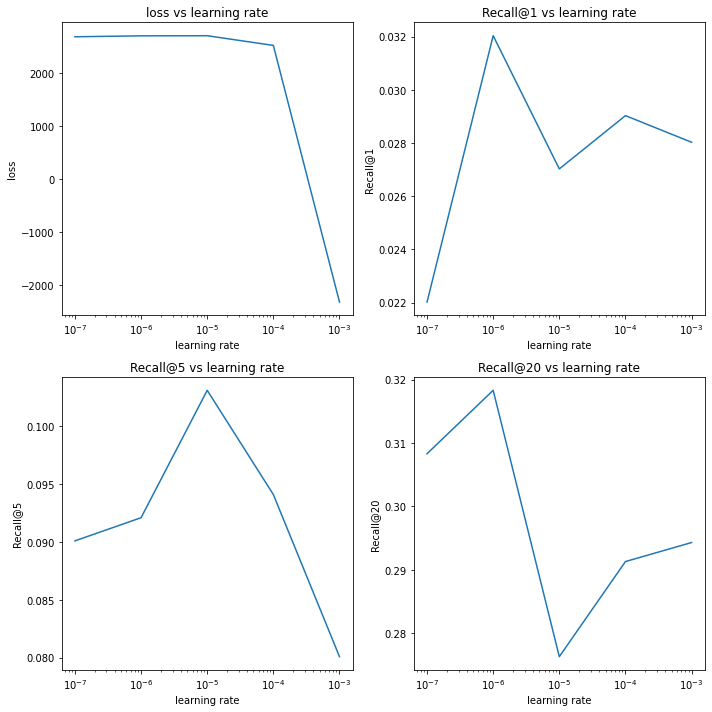

In [20]:
learning_rates_str = ['1e-3', '1e-4', '1e-5', '1e-6','1e-7']
top_k=20
scores = get_vs_lr_scores(learning_rates_str, top_k)
plot_vs_lr(scores, True)

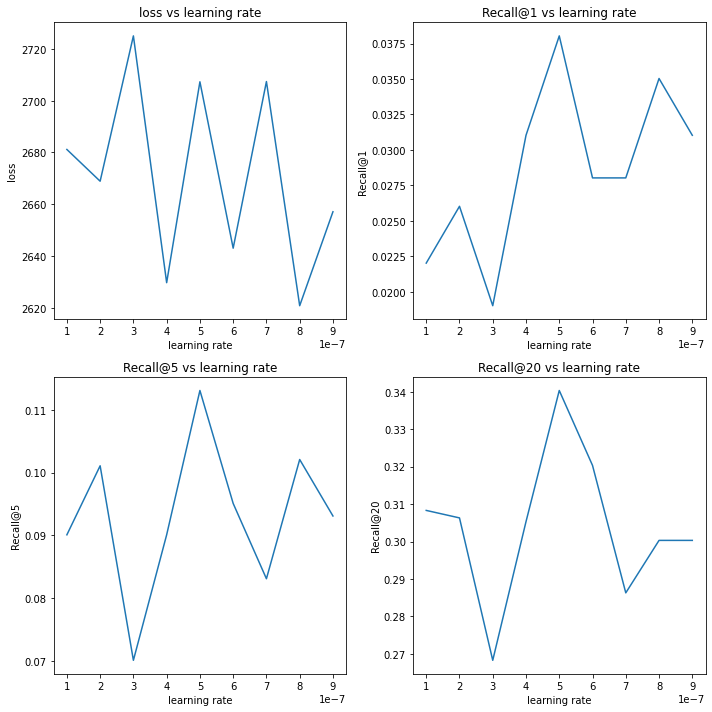

In [21]:
learning_rates_str = ['1e-7', '2e-7', '3e-7', '4e-7', '5e-7', '6e-7', '7e-7', '8e-7', '9e-7']
top_k=20
scores = get_vs_lr_scores(learning_rates_str, top_k)
plot_vs_lr(scores, False)

# A Random Point vs Nearest Neighbor

In [36]:
def get_vs_arch_scores(model_arch, top_k):
    scores = {'loss': list(), 'Recall@1': list(), 'Recall@5': list(), 'Recall@20': list()}
    lr_str = '5e-7'
    for arch in model_arch:
        dir_path = root / arch / f'top{top_k}' / lr_str
        file_name = [x for x in os.listdir(dir_path) if x.startswith('best_checkpoint_')][0]
        checkpoints = torch.load(dir_path / file_name, 'cpu')
        for m in scores.keys():
            scores[m].append(checkpoints['metrics_scores'][m])
    scores['model_arch'] = model_arch
    return scores

In [37]:
top_k = 20
model_arch = ['500-100-20', '500-100-20-20', '5000-1000-200-200']
scores = get_vs_arch_scores(model_arch, top_k)

FileNotFoundError: [Errno 2] No such file or directory: '../checkpoints/500-100-20/top20/5e-7'

In [38]:
scores

{'loss': [-53.442955017089844, 25.681215286254883, -9.416683197021484],
 'Recall@1': [0.02902902902902903, 0.024024024024024024, 0.057057057057057055],
 'Recall@5': [0.02902902902902903, 0.024024024024024024, 0.057057057057057055],
 'Recall@20': [0.02902902902902903,
  0.024024024024024024,
  0.057057057057057055],
 'model_arch': ['500-100-20', '500-100-20-20', '5000-1000-200-200']}

# retrieve a model checkpoint

In [53]:
s = '200-200-100-100-100-50-50-50-25-25-25-20-20'
lr = '1e-2'
dir_path = Path('../checkpoints') / s / 'top20' / lr
file_name = [x for x in os.listdir(dir_path) if x.startswith('best_checkpoint_')][0]

print(torch.load(dir_path / file_name, 'cpu')['dev_metrics_scores'])

{'loss': 2751.59326171875, 'Recall@1': 0.01701701701701702, 'Recall@5': 0.06306306306306306, 'Recall@10': 0.12612612612612611, 'Recall@20': 0.22922922922922923}


# performance vs number of top_k neighbors considered

In [64]:
def get_vs_arch_scores(top_k_list):
    scores = {'loss': list(), 'Recall@1': list(), 'Recall@5': list(), 'Recall@20': list()}
    lr_str = '5e-7'
    for top_k in top_k_list:
        dir_path = root / '200-100-50-25-20' / f'top{top_k}' / lr_str
        file_name = [x for x in os.listdir(dir_path) if x.startswith('best_checkpoint_')][0]
        checkpoints = torch.load(dir_path / file_name, 'cpu')
        for m in scores.keys():
            scores[m].append(checkpoints['dev_metrics_scores'][m])
    scores['top_k'] = top_k_list
    return scores

In [65]:
scores = get_vs_arch_scores([1,3,5,7,9,11,13,15,17,19])

In [66]:
scores

{'loss': [2661.599609375,
  2689.591796875,
  2677.574951171875,
  2654.77978515625,
  2703.85400390625,
  2661.939208984375,
  2695.998291015625,
  2658.829345703125,
  2692.636962890625,
  2704.83154296875],
 'Recall@1': [0.021021021021021023,
  0.02902902902902903,
  0.028028028028028028,
  0.024024024024024024,
  0.026026026026026026,
  0.035035035035035036,
  0.024024024024024024,
  0.022022022022022022,
  0.022022022022022022,
  0.02702702702702703],
 'Recall@5': [0.07107107107107107,
  0.09109109109109109,
  0.1001001001001001,
  0.09509509509509509,
  0.0940940940940941,
  0.1011011011011011,
  0.08608608608608609,
  0.08808808808808809,
  0.07907907907907907,
  0.09109109109109109],
 'Recall@20': [0.2872872872872873,
  0.2922922922922923,
  0.3053053053053053,
  0.2772772772772773,
  0.3073073073073073,
  0.2962962962962963,
  0.2992992992992993,
  0.2952952952952953,
  0.25925925925925924,
  0.2932932932932933],
 'top_k': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

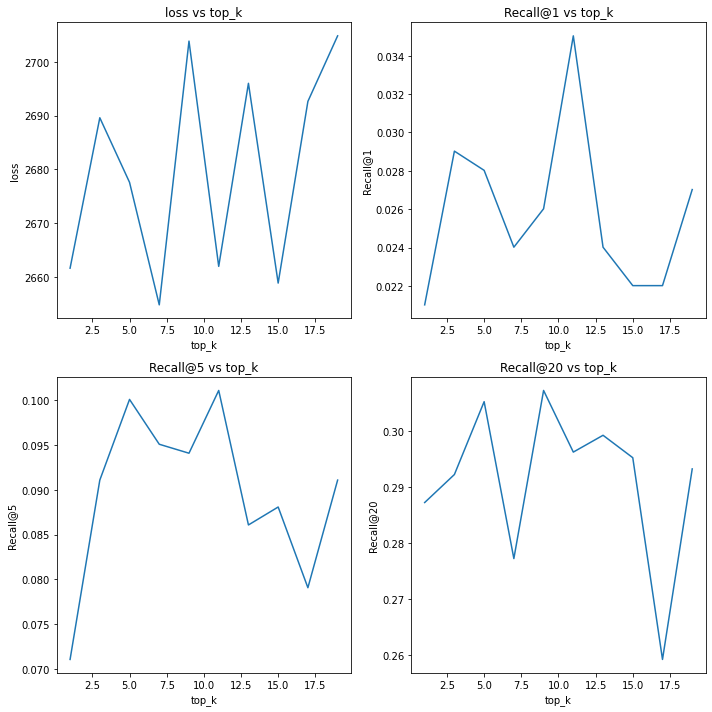

In [67]:
plot_subgraph(scores, False, 'top_k')